In [1]:
import bagpy
from bagpy import bagreader
import pandas as pd
import seaborn as sea
import numpy as np
import matplotlib.pyplot as plt

In [2]:
b = bagreader('/home/francis/catkin_ws/src/rtk_gps/Data/obs_moving.bag')

[INFO]  Data folder /home/francis/catkin_ws/src/rtk_gps/Data/obs_moving already exists. Not creating.


In [3]:
b.topic_table

,Topics,Types,Message Count,Frequency
0,/gnss,gnss_driver/gnss_msg,476,0.999995


In [4]:
def data_csv(b):
    csvfiles = []
    for t in b.topics:
        data = b.message_by_topic(t)
        csvfiles.append(data)
        
    print(csvfiles[0])
    data = pd.read_csv(csvfiles[0])
    return data

In [5]:
csv_data = data_csv(b)

/home/francis/catkin_ws/src/rtk_gps/Data/obs_moving/gnss.csv


In [6]:
f = pd.read_csv("/home/francis/catkin_ws/src/rtk_gps/Data/obs_moving/gnss.csv")

In [7]:
f['UTM_easting_median'] = f['UTM_easting'] - f['UTM_easting'].median(axis=0)
f['UTM_northing_median'] = f['UTM_northing'] - f['UTM_northing'].median(axis=0)

In [8]:
f

,Time,Header.seq,Header.stamp.secs,Header.stamp.nsecs,Header.frame_id,Latitude,Longitude,Altitude,UTM_easting,UTM_northing,Zone,Letter,quality,satellites,hdop,UTM_easting_median,UTM_northing_median
0,1.665616e+09,0,1665629936,0,GNSS1_Frame,42.337382,-71.086393,8.6,328122.037258,4.689345e+06,19,T,4,12,0.87,-42.325526,-7.603440
1,1.665616e+09,0,1665629937,0,GNSS1_Frame,42.337382,-71.086393,8.6,328122.037258,4.689345e+06,19,T,4,12,0.87,-42.325526,-7.603440
2,1.665616e+09,0,1665629938,0,GNSS1_Frame,42.337383,-71.086393,8.6,328122.037712,4.689345e+06,19,T,4,12,0.87,-42.325072,-7.584933
3,1.665616e+09,0,1665629939,0,GNSS1_Frame,42.337383,-71.086393,8.7,328122.037712,4.689345e+06,19,T,4,12,0.87,-42.325072,-7.584933
4,1.665616e+09,0,1665629940,0,GNSS1_Frame,42.337383,-71.086393,8.6,328122.037712,4.689345e+06,19,T,4,12,0.87,-42.325072,-7.584933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,1.665616e+09,0,1665630407,0,GNSS1_Frame,42.337431,-71.086489,8.7,328114.233544,4.689350e+06,19,T,4,12,0.91,-50.129240,-2.004649
472,1.665616e+09,0,1665630408,0,GNSS1_Frame,42.337430,-71.086492,8.8,328114.011130,4.689350e+06,19,T,4,12,1.01,-50.351654,-2.110301
473,1.665616e+09,0,1665630409,0,GNSS1_Frame,42.337429,-71.086496,8.7,328113.693055,4.689350e+06,19,T,5,12,0.91,-50.669730,-2.195087
474,1.665616e+09,0,1665630410,0,GNSS1_Frame,42.337429,-71.086496,8.7,328113.705877,4.689350e+06,19,T,5,12,0.91,-50.656907,-2.232439


In [9]:
f['quality']. value_counts()

5    264
4    197
2     15
Name: quality, dtype: int64

In [10]:
x=()

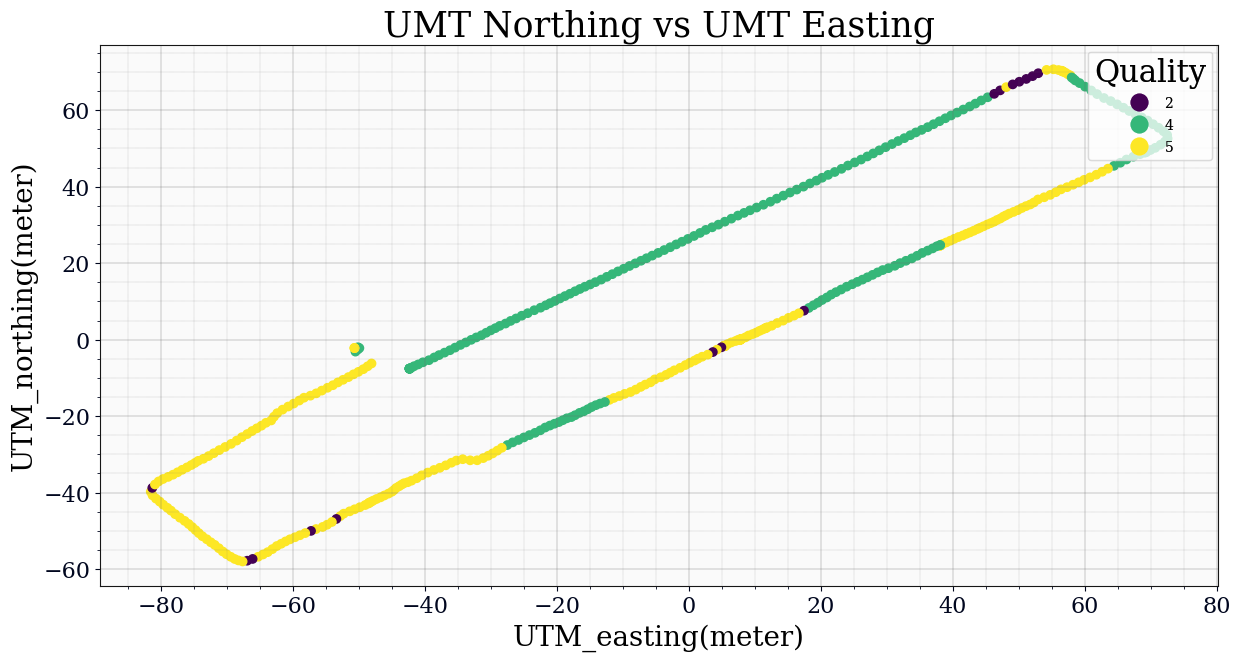

In [11]:
fig, a = bagpy.create_fig(1)
scatter = a[0].scatter(x='UTM_easting_median', y='UTM_northing_median', data=f, c='quality')
y=f['UTM_easting_median'][0:120]
x=f['UTM_northing_median'][0:120]
#m,b = np.polyfit(x,y,1)
#plt.plot(x,(m*x) + b,color="black")
plt.title("UMT Northing vs UMT Easting")
plt.xlabel("UTM_easting(meter)")
plt.ylabel("UTM_northing(meter)")
legend1 =a[0].legend(*scatter.legend_elements(), loc="upper right", title="Quality")
a[0].add_artist(legend1)
plt.show()

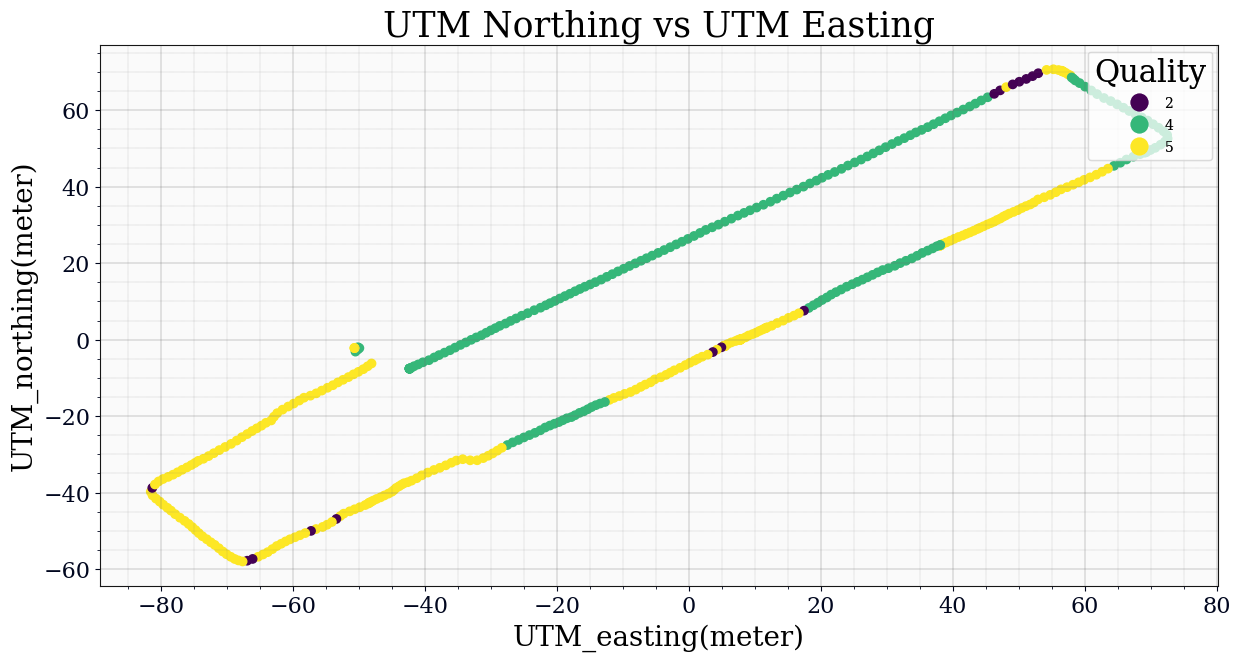

In [12]:
fig, a = bagpy.create_fig(1)
scatter = a[0].scatter(x='UTM_easting_median', y='UTM_northing_median', data=f, c='quality')
# y=f['UTM_easting_median'][0:50]
# x=f['UTM_northing_median'][0:50]
# m,b = np.polyfit(x,y,1)
# plt.plot(x,(m*x) + b,color="black")
plt.title("UTM Northing vs UTM Easting")
plt.xlabel("UTM_easting(meter)")
plt.ylabel("UTM_northing(meter)")
legend1 =a[0].legend(*scatter.legend_elements(), loc="upper right", title="Quality")
a[0].add_artist(legend1)
plt.show()

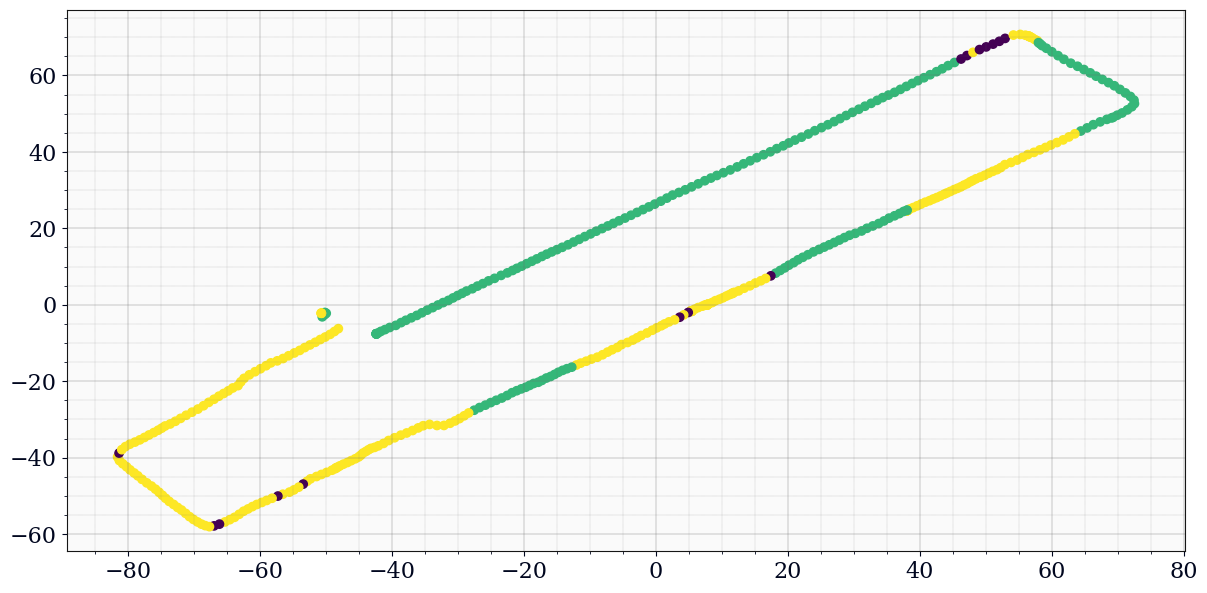

In [13]:
fig, a = bagpy.create_fig(1)
scatter = a[0].scatter(x='UTM_easting_median', y='UTM_northing_median', data=f, c='quality')
x_e1 = f['UTM_easting_median'][0:80]
y_e1 = f['UTM_northing_median'][0:80]

/home/francis/miniconda3/lib/python3.9/site-packages/matplotlib/collections.py:1084: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


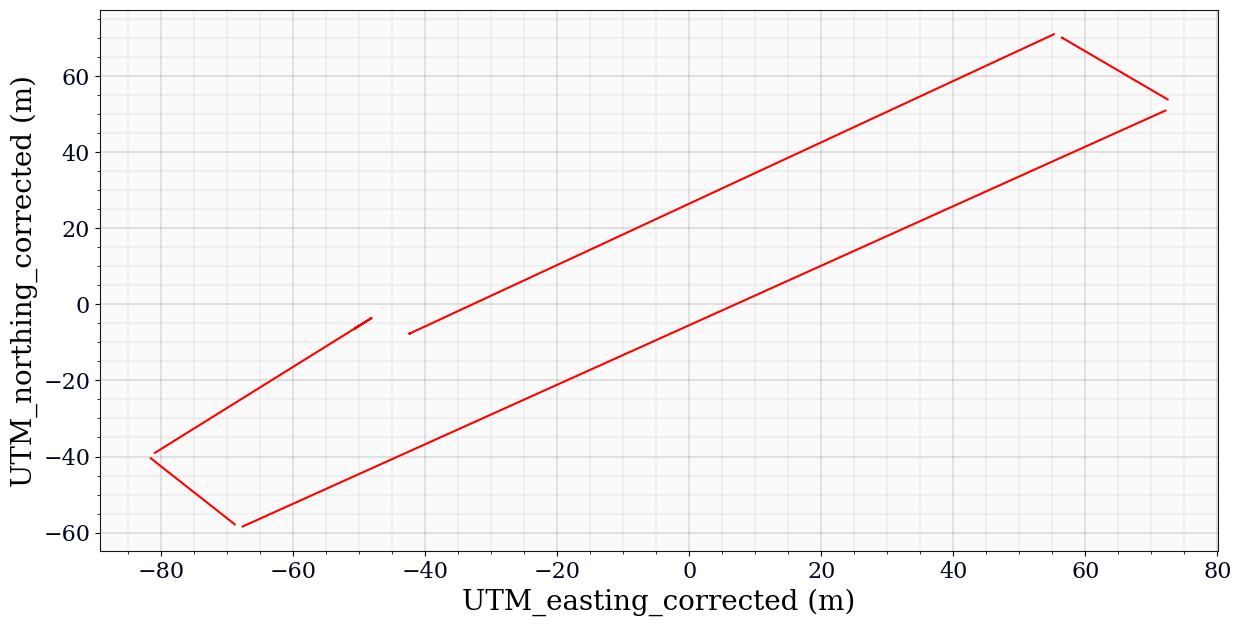

In [14]:
#corrected - the minimum of the each data in easting and northing was subtracted 
#from the  easting and northing datapoints respectively. 
fig, ax = bagpy.create_fig(1)
x_e1 = f['UTM_easting_median'][0:119]
y_e1 = f['UTM_northing_median'][0:119]
x_e2 = f['UTM_easting_median'][120:147]
y_e2 = f['UTM_northing_median'][120:147]
x_e3 = f['UTM_easting_median'][148:396]
y_e3 = f['UTM_northing_median'][148:396]
x_e4 = f['UTM_easting_median'][397:420]
y_e4 = f['UTM_northing_median'][397:420]
x_e5 = f['UTM_easting_median'][421:475]
y_e5 = f['UTM_northing_median'][421:475]
scatter = a[0].scatter(x='UTM_easting_median', y='UTM_northing_median', data=f, c = 'r')
plt.xlabel("UTM_easting_corrected (m)")
plt.ylabel("UTM_northing_corrected (m)")
legend1 = a[0].legend(*scatter.legend_elements(), loc="upper right", title="RTK Quality")
a[0].add_artist(legend1)
line_coords1, residual1, _, _, _ = np.polyfit(x_e1, y_e1, 1, full=True) 
line_coords2, residual2, _, _, _ = np.polyfit(x_e2, y_e2, 1, full=True) 
line_coords3, residual3, _, _, _ = np.polyfit(x_e3, y_e3, 1, full=True) 
line_coords4, residual4, _, _, _ = np.polyfit(x_e4, y_e4, 1, full=True)
line_coords5, residual5, _, _, _ = np.polyfit(x_e5, y_e5, 1, full=True)
plt.plot(x_e1, line_coords1[0]*x_e1+line_coords1[1], color='red')
plt.plot(x_e2, line_coords2[0]*x_e2+line_coords2[1], color='red')
plt.plot(x_e3, line_coords3[0]*x_e3+line_coords3[1], color='red')
plt.plot(x_e4, line_coords4[0]*x_e4+line_coords4[1], color='red')
plt.plot(x_e5, line_coords5[0]*x_e5+line_coords5[1], color='red')
#plt.savefig('/home/marley/walk.png')
plt.show()

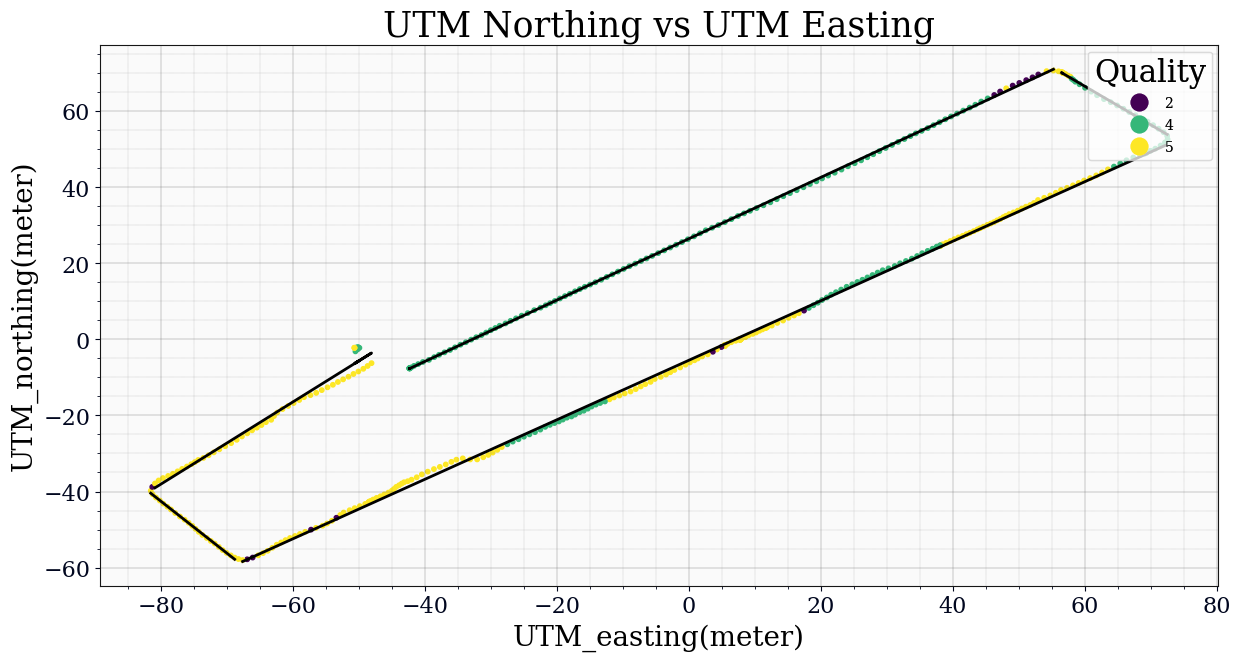

In [15]:
fig, a = bagpy.create_fig(1)
scatter = a[0].scatter(x='UTM_easting_median', y='UTM_northing_median', data=f, c='quality',s=10)
y=f['UTM_easting_median'][0:50]
x=f['UTM_northing_median'][0:50]
plt.title("UTM Northing vs UTM Easting")
plt.xlabel("UTM_easting(meter)")
plt.ylabel("UTM_northing(meter)")
legend1 =a[0].legend(*scatter.legend_elements(), loc="upper right", title="Quality")
plt.plot(x_e1, line_coords1[0]*x_e1+line_coords1[1], color='black',linewidth=2.0)
plt.plot(x_e2, line_coords2[0]*x_e2+line_coords2[1], color='black',linewidth=2.0)
plt.plot(x_e3, line_coords3[0]*x_e3+line_coords3[1], color='black',linewidth=2.0)
plt.plot(x_e4, line_coords4[0]*x_e4+line_coords4[1], color='black',linewidth=2.0)
plt.plot(x_e5, line_coords5[0]*x_e5+line_coords5[1], color='black',linewidth=2.0)
a[0].add_artist(legend1)


In [16]:
Res=residual1+residual2+residual3+residual4+residual5
Mean_Res=(Res)/f.shape[0]
RMSE=np.sqrt(Mean_Res)
print(RMSE)

[0.82421817]


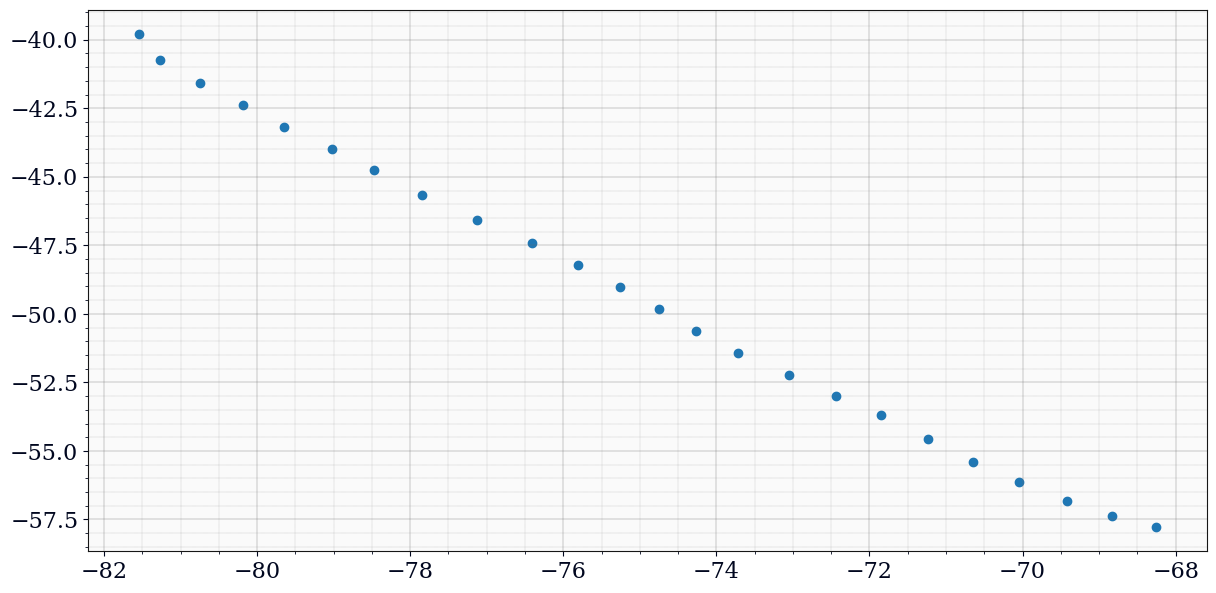

In [17]:
# fig, ax = bagpy.create_fig(1)
x_e1 = f['UTM_easting_median'][396:420]
y_e1 = f['UTM_northing_median'][396:420]

fig, a = bagpy.create_fig(1)

scatter = a[0].scatter(x=x_e1, y=y_e1)
#plt.savefig('/home/marley/walk.png')
plt.show()